In [1]:
# Import the libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
#Store the data into variables
df1 = pd.read_csv('data/Dow_Jones_Industrial_Average_News.csv')
df2 = pd.read_csv('data/Dow_Jones_Industrial_Average_Stock.csv')

In [3]:
df2.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969


In [4]:
#Show the first 3 rows of data for the news (df1)
df1.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [5]:
#Merge the data set on the date field
merge = df1.merge(df2, how='inner', on='Date')
#Show the merged data set
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973


In [6]:
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973


In [7]:
#Combine the top news headlines
headlines = []
for row in range(0,len(merge.index)):
    headlines.append(' '.join(str(x) for x in merge.iloc[row,2:27]))

In [8]:
#Clean the data
clean_headlines = []
for i in range(0, len(headlines)):
    clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
    clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
    clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

In [9]:
#Add the clean headlines to the data set
merge['Combined_News'] = clean_headlines

In [10]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [11]:
# Create two new columns 'Subjectivity' & 'Polarity'
merge['Subjectivity'] =merge['Combined_News'].apply(getSubjectivity)
merge['Polarity'] =merge['Combined_News'].apply(getPolarity)

In [12]:
#Create a function to get the sentiment scores (using Sentiment Intensity Analyzer)
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [13]:
#Get the sentiment scores for each day
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(merge['Combined_News'])):
    SIA = getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [14]:
#Store the sentiment scores in the data frame
merge['Compound'] =compound
merge['Negative'] =neg
merge['Neutral'] =neu
merge['Positive'] = pos

In [15]:
#Create a list of columns to keep
keep_columns = [ 'Date', 'Close', 'Volume', 'Subjectivity', 'Polarity', 'Compound' ]
df = merge[keep_columns]

In [16]:
df

,Date,Close,Volume,Subjectivity,Polarity,Compound
0,2008-08-08,11734.32031,212830000,0.267549,-0.048568,-0.9982
1,2008-08-11,11782.34961,183190000,0.374806,0.121956,-0.9858
2,2008-08-12,11642.46973,173590000,0.536234,-0.044302,-0.9715
3,2008-08-13,11532.95996,182550000,0.364021,0.011398,-0.9809
4,2008-08-14,11615.92969,159790000,0.375099,0.040677,-0.9882
...,...,...,...,...,...,...
1984,2016-06-27,17140.24023,138740000,0.352311,-0.014015,-0.9644
1985,2016-06-28,17409.72070,112190000,0.352649,0.046560,-0.9571
1986,2016-06-29,17694.67969,106380000,0.389617,0.052622,-0.9975
1987,2016-06-30,17929.99023,133030000,0.382566,0.011243,-0.9977


In [17]:
from alpha_vantage.timeseries import TimeSeries
import os 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
ALPHA_VANTAGE_API_KEY = 'XAGC5LBB1SI9RDLW'
ts = TimeSeries(key= ALPHA_VANTAGE_API_KEY, output_format='pandas')

In [19]:
QQQ, QQQ_info = ts.get_daily('QQQ', outputsize='full') 
QQQ = QQQ.rename(columns={'1. open' : 'Open', '2. high': 'High', '3. low':'Low', '4. close': 'QQQ_Close', '5. volume': 'Volume' })
QQQ = QQQ.rename_axis(['Date'])
QQQ = QQQ.drop(columns=['Open', 'High', 'Low', 'Volume'])
QQQ

,QQQ_Close
Date,
2021-11-29,399.69
2021-11-26,391.20
2021-11-24,398.76
2021-11-23,397.48
2021-11-22,399.30
...,...
1999-11-05,136.40
1999-11-04,135.00
1999-11-03,133.50


In [20]:
#sorting index
QQQ = QQQ.sort_index(ascending=True, axis=0)
#slicing the data
QQQ = QQQ.loc['2008-08-08':'2016-07-01']
QQQ['Date'] = QQQ.index
QQQ = QQQ.reset_index(drop=True)
QQQ = QQQ.astype({"Date": str})
QQQ

,QQQ_Close,Date
0,47.32,2008-08-08
1,47.75,2008-08-11
2,47.80,2008-08-12
3,47.70,2008-08-13
4,48.25,2008-08-14
...,...,...
1984,102.22,2016-06-27
1985,104.46,2016-06-28
1986,106.31,2016-06-29
1987,107.54,2016-06-30


In [21]:
import yfinance as yf
AXJO = yf.download('^AXJO', start="2008-08-08", end="2016-07-01")
AXJO = AXJO.rename(columns={'Close': 'AXJO_Close'})
AXJO = AXJO.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close'])
AXJO['Date'] = AXJO.index
AXJO = AXJO.reset_index(drop=True)
AXJO = AXJO.astype({"Date": str})
AXJO

[*********************100%***********************]  1 of 1 completed


,AXJO_Close,Date
0,4986.200195,2008-08-08
1,5026.100098,2008-08-11
2,5053.600098,2008-08-12
3,4951.600098,2008-08-13
4,4981.100098,2008-08-14
...,...,...
1985,5137.200195,2016-06-27
1986,5103.299805,2016-06-28
1987,5142.399902,2016-06-29
1988,5233.399902,2016-06-30


In [22]:
import yfinance as yf
CLF = yf.download('CL=F', start="2008-08-08", end="2016-07-01")
CLF = CLF.rename(columns={'Close': 'CLF_Close'})
CLF = CLF.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close'])
CLF['Date'] = CLF.index
CLF = CLF.reset_index(drop=True)
CLF = CLF.astype({"Date": str})
CLF

[*********************100%***********************]  1 of 1 completed


,CLF_Close,Date
0,115.199997,2008-08-08
1,114.449997,2008-08-11
2,113.010002,2008-08-12
3,116.000000,2008-08-13
4,115.010002,2008-08-14
...,...,...
1968,46.330002,2016-06-27
1969,47.849998,2016-06-28
1970,49.880001,2016-06-29
1971,48.330002,2016-06-30


In [23]:
type(df['Date']), type(QQQ['Date'])

(pandas.core.series.Series, pandas.core.series.Series)

In [24]:
#Merge on the date field
df = df.merge(QQQ, how='inner', on='Date')
df = df.merge(AXJO, how='inner', on='Date')
df = df.merge(CLF, how='inner', on='Date')
df

,Date,Close,Volume,Subjectivity,Polarity,Compound,QQQ_Close,AXJO_Close,CLF_Close
0,2008-08-08,11734.32031,212830000,0.267549,-0.048568,-0.9982,47.32,4986.200195,115.199997
1,2008-08-11,11782.34961,183190000,0.374806,0.121956,-0.9858,47.75,5026.100098,114.449997
2,2008-08-12,11642.46973,173590000,0.536234,-0.044302,-0.9715,47.80,5053.600098,113.010002
3,2008-08-13,11532.95996,182550000,0.364021,0.011398,-0.9809,47.70,4951.600098,116.000000
4,2008-08-14,11615.92969,159790000,0.375099,0.040677,-0.9882,48.25,4981.100098,115.010002
...,...,...,...,...,...,...,...,...,...
1921,2016-06-27,17140.24023,138740000,0.352311,-0.014015,-0.9644,102.22,5137.200195,46.330002
1922,2016-06-28,17409.72070,112190000,0.352649,0.046560,-0.9571,104.46,5103.299805,47.849998
1923,2016-06-29,17694.67969,106380000,0.389617,0.052622,-0.9975,106.31,5142.399902,49.880001
1924,2016-06-30,17929.99023,133030000,0.382566,0.011243,-0.9977,107.54,5233.399902,48.330002


In [25]:
df = df.rename(columns={'Close' : 'DJIA_Close', 'Volume': 'DJIA_Volume'})
df

,Date,DJIA_Close,DJIA_Volume,Subjectivity,Polarity,Compound,QQQ_Close,AXJO_Close,CLF_Close
0,2008-08-08,11734.32031,212830000,0.267549,-0.048568,-0.9982,47.32,4986.200195,115.199997
1,2008-08-11,11782.34961,183190000,0.374806,0.121956,-0.9858,47.75,5026.100098,114.449997
2,2008-08-12,11642.46973,173590000,0.536234,-0.044302,-0.9715,47.80,5053.600098,113.010002
3,2008-08-13,11532.95996,182550000,0.364021,0.011398,-0.9809,47.70,4951.600098,116.000000
4,2008-08-14,11615.92969,159790000,0.375099,0.040677,-0.9882,48.25,4981.100098,115.010002
...,...,...,...,...,...,...,...,...,...
1921,2016-06-27,17140.24023,138740000,0.352311,-0.014015,-0.9644,102.22,5137.200195,46.330002
1922,2016-06-28,17409.72070,112190000,0.352649,0.046560,-0.9571,104.46,5103.299805,47.849998
1923,2016-06-29,17694.67969,106380000,0.389617,0.052622,-0.9975,106.31,5142.399902,49.880001
1924,2016-06-30,17929.99023,133030000,0.382566,0.011243,-0.9977,107.54,5233.399902,48.330002


<AxesSubplot:>

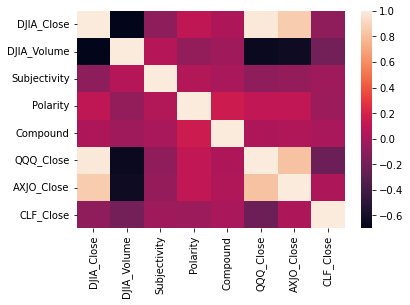

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr())

In [27]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\ProgramData\Anaconda3\envs\cookiecutter\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,DJIA_Close,DJIA_Volume,Subjectivity,Polarity,Compound,QQQ_Close,AXJO_Close,CLF_Close
DJIA_Close,1.00,-0.70,-0.09,0.10,0.03,0.98,0.86,-0.09
DJIA_Volume,-0.70,1.00,0.05,-0.07,-0.03,-0.66,-0.64,-0.20
Subjectivity,-0.09,0.05,1.00,0.04,0.01,-0.09,-0.06,-0.03
Polarity,0.10,-0.07,0.04,1.00,0.15,0.11,0.10,-0.04
Compound,0.03,-0.03,0.01,0.15,1.00,0.03,0.04,0.01
QQQ_Close,0.98,-0.66,-0.09,0.11,0.03,1.00,0.82,-0.23
AXJO_Close,0.86,-0.64,-0.06,0.10,0.04,0.82,1.00,0.03
CLF_Close,-0.09,-0.20,-0.03,-0.04,0.01,-0.23,0.03,1.00


In [28]:
for index in range(df.shape[0]-1):
    if (df['Subjectivity'][index] >=0.5):
        df.loc[index, 'subjectivity'] = 'objective'
    else:
        df.loc[index, 'subjectivity'] = 'subjective'
        
    if (df['Polarity'][index] >=0.0):
        df.loc[index, 'polarity'] = 'positive'
    else:
        df.loc[index, 'polarity'] = 'negative'    
        
    if (df['Compound'][index] >=0.0):
        df.loc[index, 'sentiment'] = 'positive'
    else:
        df.loc[index, 'sentiment'] = 'negative'
        
    if (df['DJIA_Close'][index+1] >= df['DJIA_Close'][index]):
        df.loc[index, 'djia_close1'] = 'up'
    else:
        df.loc[index, 'djia_close1'] = 'down'        

    if (df['DJIA_Volume'][index+1] >= df['DJIA_Volume'][index]):
        df.loc[index, 'djia_volume'] = 'up'
    else:
        df.loc[index, 'djia_volume'] = 'down'           

    if (df['QQQ_Close'][index+1] >= df['QQQ_Close'][index]):
        df.loc[index, 'qqq_close'] = 'up'
    else:
        df.loc[index, 'qqq_close'] = 'down'  
        
    if (df['AXJO_Close'][index+1] >= df['AXJO_Close'][index]):
        df.loc[index, 'axjo_close'] = 'up'
    else:
        df.loc[index, 'axjo_close'] = 'down'  
        
    if (df['CLF_Close'][index+1] >= df['CLF_Close'][index]):
        df.loc[index, 'clf_close'] = 'up'
    else:
        df.loc[index, 'clf_close'] = 'down'
        
#    if (df['Label'][index] == 1):
#        df.loc[index, 'DJIA_direction_'] = 'up'
#    else:
#        df.loc[index, 'DJIA_direction_'] = 'down'          

In [29]:
df

,Date,DJIA_Close,DJIA_Volume,Subjectivity,Polarity,Compound,QQQ_Close,AXJO_Close,CLF_Close,subjectivity,polarity,sentiment,djia_close1,djia_volume,qqq_close,axjo_close,clf_close
0,2008-08-08,11734.32031,212830000,0.267549,-0.048568,-0.9982,47.32,4986.200195,115.199997,subjective,negative,negative,up,down,up,up,down
1,2008-08-11,11782.34961,183190000,0.374806,0.121956,-0.9858,47.75,5026.100098,114.449997,subjective,positive,negative,down,down,up,up,down
2,2008-08-12,11642.46973,173590000,0.536234,-0.044302,-0.9715,47.80,5053.600098,113.010002,objective,negative,negative,down,up,down,down,up
3,2008-08-13,11532.95996,182550000,0.364021,0.011398,-0.9809,47.70,4951.600098,116.000000,subjective,positive,negative,up,down,up,up,down
4,2008-08-14,11615.92969,159790000,0.375099,0.040677,-0.9882,48.25,4981.100098,115.010002,subjective,positive,negative,up,up,down,up,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2016-06-27,17140.24023,138740000,0.352311,-0.014015,-0.9644,102.22,5137.200195,46.330002,subjective,negative,negative,up,down,up,down,up
1922,2016-06-28,17409.72070,112190000,0.352649,0.046560,-0.9571,104.46,5103.299805,47.849998,subjective,positive,negative,up,down,up,up,up
1923,2016-06-29,17694.67969,106380000,0.389617,0.052622,-0.9975,106.31,5142.399902,49.880001,subjective,positive,negative,up,up,up,up,down
1924,2016-06-30,17929.99023,133030000,0.382566,0.011243,-0.9977,107.54,5233.399902,48.330002,subjective,positive,negative,up,down,up,up,up


In [30]:
df = df.drop(columns=['DJIA_Close', 'DJIA_Volume', 'Subjectivity', 'Polarity', 'Compound', 'QQQ_Close', 'AXJO_Close', 'CLF_Close'])
df = df.dropna()
df

,Date,subjectivity,polarity,sentiment,djia_close1,djia_volume,qqq_close,axjo_close,clf_close
0,2008-08-08,subjective,negative,negative,up,down,up,up,down
1,2008-08-11,subjective,positive,negative,down,down,up,up,down
2,2008-08-12,objective,negative,negative,down,up,down,down,up
3,2008-08-13,subjective,positive,negative,up,down,up,up,down
4,2008-08-14,subjective,positive,negative,up,up,down,up,down
...,...,...,...,...,...,...,...,...,...
1920,2016-06-24,subjective,positive,negative,down,down,down,up,down
1921,2016-06-27,subjective,negative,negative,up,down,up,down,up
1922,2016-06-28,subjective,positive,negative,up,down,up,up,up
1923,2016-06-29,subjective,positive,negative,up,up,up,up,down


In [31]:
df['djia_close2'] = df['djia_close1'].shift(-1)
df = df.dropna()
df

,Date,subjectivity,polarity,sentiment,djia_close1,djia_volume,qqq_close,axjo_close,clf_close,djia_close2
0,2008-08-08,subjective,negative,negative,up,down,up,up,down,down
1,2008-08-11,subjective,positive,negative,down,down,up,up,down,down
2,2008-08-12,objective,negative,negative,down,up,down,down,up,up
3,2008-08-13,subjective,positive,negative,up,down,up,up,down,up
4,2008-08-14,subjective,positive,negative,up,up,down,up,down,down
...,...,...,...,...,...,...,...,...,...,...
1919,2016-06-23,subjective,positive,negative,down,up,down,down,down,down
1920,2016-06-24,subjective,positive,negative,down,down,down,up,down,up
1921,2016-06-27,subjective,negative,negative,up,down,up,down,up,up
1922,2016-06-28,subjective,positive,negative,up,down,up,up,up,up


In [32]:
df.isnull().values.any(), df.isnull().sum()

(False,
 Date            0
 subjectivity    0
 polarity        0
 sentiment       0
 djia_close1     0
 djia_volume     0
 qqq_close       0
 axjo_close      0
 clf_close       0
 djia_close2     0
 dtype: int64)

In [33]:
df.to_csv('data/processed.csv', index=False)

In [34]:
train = df[df['Date'] < '2016-01-01']
test = df[df['Date'] > '2015-12-31']

In [35]:
print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1804
No. of testing examples: 120


In [36]:
train.to_csv('data/processed_train.csv', index=False)
test.to_csv('data/processed_test.csv', index=False)